# Preparación Data Final para Modelar

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
import matplotlib


# Manejo de fechas
import datetime
import matplotlib.dates as mdates
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn import metrics

pd.set_option('display.max_columns', None)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn.externals import joblib
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

## Datos

In [2]:
#header_list=["cliente_id","no_documento","tipo_documento","nombre_completo_cliente","nombre_cliente","primer_apellido_cliente","segundo_apellido_cliente","email_cliente","tlf_principal","tlf_celular","tlf_domicilio","tlf_empresa","tlf_otro","fecha_nacimiento_cliente","genero_cliente","estado_civil_cliente","direccion_domicilio","empresa","direccion_empresa","cargo","profesion","fecha_ultima_actualizacion","fuente_ultima_actualizacion","ciudad_cliente","segmento_cliente","sueldo_cliente","tipo_empleado","cargas_familiares_cliente","nombre","fullDate","Tiempo","fase","gestion","tipo_gestion","subtipo_gestion","subtipo_gestion1","gestion_gxc_id","tipo_gestion_gxc_id","subtipo_gestion_gxc_id","categoria","fuente_gxc","gestion_gxc_estatus","tipo_gestion_gxc_estatus","subtipo_gestion_gxc_estatus","gestionado","contactado","contactabilidad_efectiva","ganada","perdida","no_perfil","indeciso","agente_id","usuario_agente","primer_apellido_agente","segundo_apellido","nombres_agente","cedula_agente","fecha_de_nacimiento_agente","edad_agente","estado_civil_agente","numero_de_hijos_agente","nivel_de_estudios_culminados_agente","celular_agente","correo_agente","direccion_agente","promedio_de_ingresos_agente"]

In [3]:
df= pd.read_csv('../sintetic_ds_test_new.csv', sep=",")

#df = pd.concat([df1,df2] , ignore_index=True)

#df= pd.read_csv('./sintetic_ds.csv', sep=";", header=None, names=header_list)
df.head()

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,crop,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,Unnamed: 25,N,P,K,No,Po,Ko,leaf_att,stem_att,store_att,SeasonLength,leaf_lim,stem_lim,store_lim,N_supply,P_supply,K_supply,N_uptake,P_uptake,K_uptake,N_gap,P_gap,K_gap
0,4.7,21,30,1.5,0.3,63.8,1.3,21.2,0.7,0.17,0.7,3810,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,6779.22444,230,130,130,0,0,0,3264.08034,3515.1441,3713.394876,240,3264.1,3515.1,3141.9,212.1,22.1,105.8,195.4,21.7,97.5,159.3,12.9,0.0
1,5.7,21,20,1.7,0.3,67.5,4.9,29.2,0.7,0.17,0.7,4870,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,8665.30788,190,110,180,0,0,0,4172.19718,4493.1107,4139.659036,240,4172.2,4493.1,3548.0,200.4,23.6,155.1,187.5,23.0,135.5,301.3,42.6,0.0
2,5.1,21,21,1.5,0.3,55.1,3.3,28.0,0.7,0.17,0.7,3090,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,5498.11116,550,80,310,0,0,0,2647.24626,2850.8649,3386.065776,240,2647.2,2850.9,3123.1,375.9,14.4,209.2,262.0,14.4,137.3,0.0,31.6,0.0
3,5.9,21,25,0.3,0.3,90.6,6.4,3.9,0.7,0.17,0.7,4050,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,7206.26220,460,130,80,0,0,0,3469.69170,3736.5705,3815.710656,240,3469.7,3736.6,3279.0,397.7,27.5,57.7,292.9,24.9,57.0,0.0,0.0,0.0
4,5.3,21,10,1.1,0.3,28.8,2.0,41.4,0.7,0.17,0.7,2960,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,5266.79904,410,130,50,0,0,0,2535.87344,2730.9256,3323.706320,240,2535.9,2730.9,2806.4,263.2,20.1,63.7,227.4,19.1,61.3,0.0,0.0,0.0


In [4]:
#TO_KEEP=['PH', 'SOC', 'KEX', 'PBRAY', 'NrTrees', 'N', 'P', 'K', 'store_att', 'N_supply']
#df = df[TO_KEEP]

df.drop(columns=['No', 'Po', 'Ko', 'Unnamed: 25','P_supply',
 'K_supply',
 'N_uptake',
 'P_uptake',
 'K_uptake',
 'N_gap',
 'P_gap',
 'K_gap',
'leaf_lim',
 'stem_lim',
 'store_lim','crop'], inplace=True)

df.columns.tolist()


['PH',
 'TEMP',
 'SOC',
 'KEX',
 'PBRAY',
 'N_base_supply',
 'P_base_supply',
 'K_base_supply',
 'N_recovery',
 'P_recovery',
 'K_recovery',
 'NrTrees',
 'NminStore',
 'NminVeg',
 'NmaxStore',
 'NmaxVeg',
 'PminStore',
 'PminVeg',
 'PmaxStore',
 'PmaxVeg',
 'KminStore',
 'KminVeg',
 'KmaxStore',
 'KmaxVeg',
 'N',
 'P',
 'K',
 'leaf_att',
 'stem_att',
 'store_att',
 'SeasonLength',
 'N_supply']

In [5]:
df.count()

PH               1500
TEMP             1500
SOC              1500
KEX              1500
PBRAY            1500
N_base_supply    1500
P_base_supply    1500
K_base_supply    1500
N_recovery       1500
P_recovery       1500
K_recovery       1500
NrTrees          1500
NminStore        1500
NminVeg          1500
NmaxStore        1500
NmaxVeg          1500
PminStore        1500
PminVeg          1500
PmaxStore        1500
PmaxVeg          1500
KminStore        1500
KminVeg          1500
KmaxStore        1500
KmaxVeg          1500
N                1500
P                1500
K                1500
leaf_att         1500
stem_att         1500
store_att        1500
SeasonLength     1500
N_supply         1500
dtype: int64

## Escogiendo columnas relevantes

In [6]:
df.value_counts()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PH             1500 non-null   float64
 1   TEMP           1500 non-null   int64  
 2   SOC            1500 non-null   int64  
 3   KEX            1500 non-null   float64
 4   PBRAY          1500 non-null   float64
 5   N_base_supply  1500 non-null   float64
 6   P_base_supply  1500 non-null   float64
 7   K_base_supply  1500 non-null   float64
 8   N_recovery     1500 non-null   float64
 9   P_recovery     1500 non-null   float64
 10  K_recovery     1500 non-null   float64
 11  NrTrees        1500 non-null   int64  
 12  NminStore      1500 non-null   float64
 13  NminVeg        1500 non-null   float64
 14  NmaxStore      1500 non-null   float64
 15  NmaxVeg        1500 non-null   float64
 16  PminStore      1500 non-null   float64
 17  PminVeg        1500 non-null   float64
 18  PmaxStor

In [7]:
y = df['N_supply']
#x= df
X = df.drop('N_supply', axis=1)
X.info()

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PH             1500 non-null   float64
 1   TEMP           1500 non-null   int64  
 2   SOC            1500 non-null   int64  
 3   KEX            1500 non-null   float64
 4   PBRAY          1500 non-null   float64
 5   N_base_supply  1500 non-null   float64
 6   P_base_supply  1500 non-null   float64
 7   K_base_supply  1500 non-null   float64
 8   N_recovery     1500 non-null   float64
 9   P_recovery     1500 non-null   float64
 10  K_recovery     1500 non-null   float64
 11  NrTrees        1500 non-null   int64  
 12  NminStore      1500 non-null   float64
 13  NminVeg        1500 non-null   float64
 14  NmaxStore      1500 non-null   float64
 15  NmaxVeg        1500 non-null   float64
 16  PminStore      1500 non-null   float64
 17  PminVeg        1500 non-null   float64
 18  PmaxStor

## RandomForestRegressor

In [8]:
print("\n")
print('\033[1m' + "N_supply Random Forest")
print('\033[0m')

#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.get_params()

#
#print("Puntaje Random Forest Regressor: " + str(regr.oob_score_))
pred =  regr.predict(X_test)
gt = y_test


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))





N_supply Random Forest

Mean Absolute Error (MAE): 35.64732957785346
Mean Squared Error (MSE): 1890.524043144794
Root Mean Squared Error (RMSE): 43.480156889606484
Mean Absolute Percentage Error (MAPE): 13.0
Accuracy: 87.0
R^2: 0.829834419757974


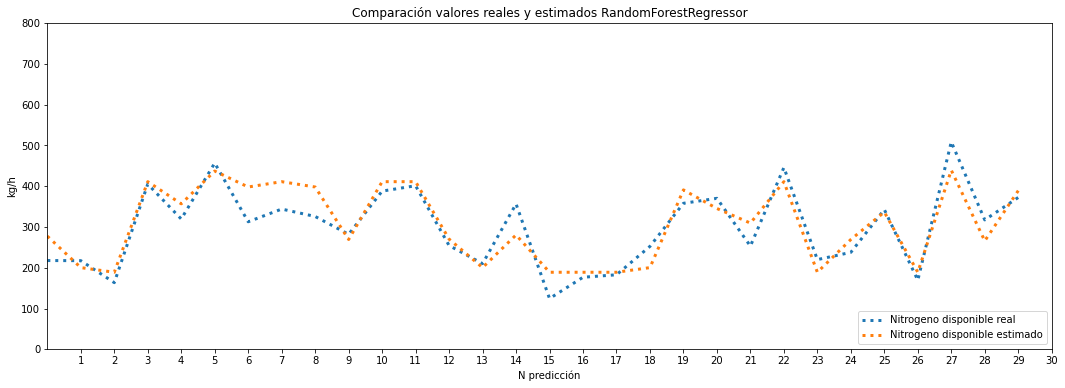

In [9]:

muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados RandomForestRegressor')
plt.legend(loc='lower right')
plt.show()

In [10]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

## Multi-layer Perceptron (MLP)

In [11]:

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)



print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)




Mean Absolute Error (MAE): 3.510851298161436
Mean Squared Error (MSE): 23.01623607789698
Root Mean Squared Error (RMSE): 4.797523952821599
Mean Absolute Percentage Error (MAPE): 1.44
Accuracy: 98.56
R^2: 0.9979283145425287


0.9979283145425287

In [12]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

In [13]:
X_test.head()


,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
471,4.7,21,12,0.7,0.3,25.5,0.6,24.7,0.7,0.17,0.7,2320,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,400,60,340,1987.57648,2140.4552,3002.174480,240
9,5.8,21,17,1.1,0.3,59.5,4.3,21.7,0.7,0.17,0.7,3230,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,270,30,230,2767.18622,2980.0303,3452.107486,240
1499,5.7,21,16,0.5,0.3,54.0,4.0,10.7,0.7,0.17,0.7,2840,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,210,60,210,2433.06776,2620.2124,3265.259120,240
54,5.1,21,29,0.9,0.3,76.1,4.5,12.2,0.7,0.17,0.7,3730,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,510,60,340,3195.54322,3441.3353,3678.534736,240
1411,5.3,21,9,1.3,0.3,25.9,1.8,54.3,0.7,0.17,0.7,2450,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,580,100,330,2098.94930,2260.3945,3069.440656,240


In [14]:
y_test.head()

471     217.7
9       217.4
1499    163.5
54      405.2
1411    319.6
Name: N_supply, dtype: float64

In [15]:
#print(regr.predict([[5.1, 21, 1.5, 1.1, 3090, 550, 80, 310, 3386.065776]]))

In [16]:
#print(regr.predict([[5.5, 13, 0.9, 1.1, 4950, 410, 120, 180, 4169.140656]]))

In [17]:
X_test[0:1]

,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,N,P,K,leaf_att,stem_att,store_att,SeasonLength
471,4.7,21,12,0.7,0.3,25.5,0.6,24.7,0.7,0.17,0.7,2320,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,400,60,340,1987.57648,2140.4552,3002.17448,240


In [18]:
display(X_test.iloc[0])

PH                  4.70000
TEMP               21.00000
SOC                12.00000
KEX                 0.70000
PBRAY               0.30000
N_base_supply      25.50000
P_base_supply       0.60000
K_base_supply      24.70000
N_recovery          0.70000
P_recovery          0.17000
K_recovery          0.70000
NrTrees          2320.00000
NminStore           0.00280
NminVeg             0.04540
NmaxStore           0.00480
NmaxVeg             0.04590
PminStore           0.00038
PminVeg             0.00380
PmaxStore           0.00028
PmaxVeg             0.00300
KminStore           0.00450
KminVeg             0.00300
KmaxStore           0.00640
KmaxVeg             0.00400
N                 400.00000
P                  60.00000
K                 340.00000
leaf_att         1987.57648
stem_att         2140.45520
store_att        3002.17448
SeasonLength      240.00000
Name: 471, dtype: float64

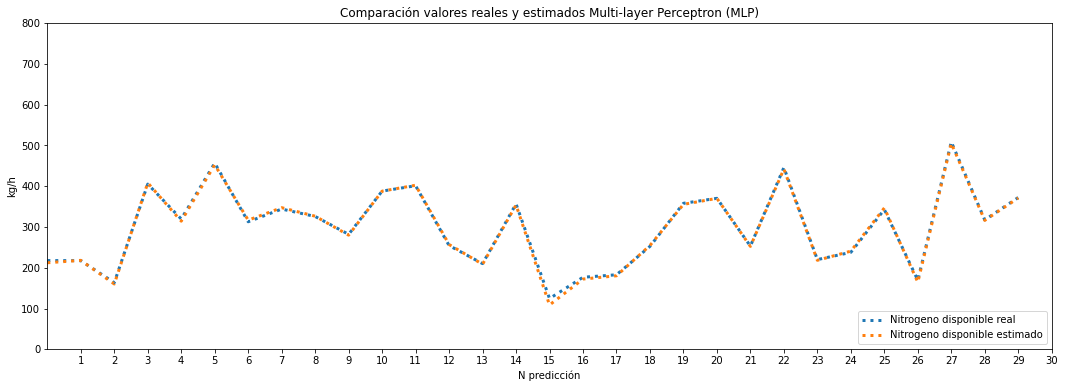

In [19]:

muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados Multi-layer Perceptron (MLP)')
plt.legend(loc='lower right')
plt.show()



##  BaggingRegressor

In [20]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [21]:


pred = regr.predict(X_test)


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)



Mean Absolute Error (MAE): 83.13433402304263
Mean Squared Error (MSE): 9958.40478275523
Root Mean Squared Error (RMSE): 99.79180719255078
Mean Absolute Percentage Error (MAPE): 31.9
Accuracy: 68.1
R^2: 0.10364656070511336


0.10364656070511336

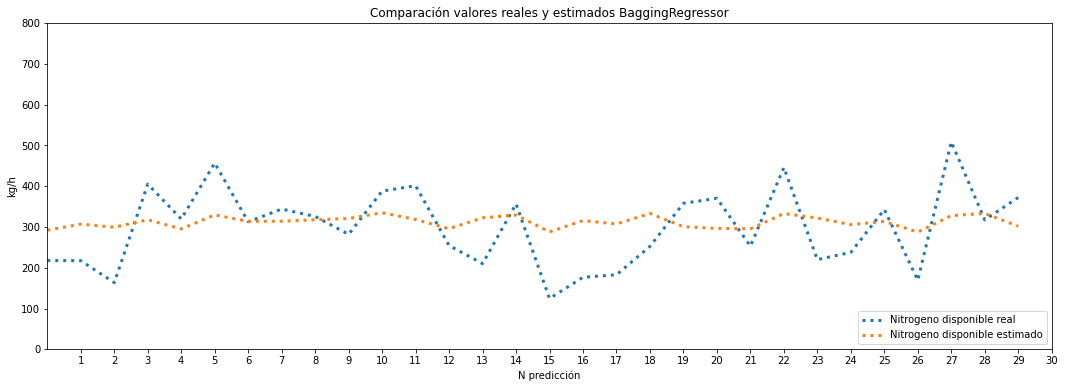

In [22]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados BaggingRegressor')
plt.legend(loc='lower right')
plt.show()


## DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state=0)
regr = regressor.fit(X_train, y_train)

pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)

#cross_val_score(regressor, X_train, y_train, cv=20)

Mean Absolute Error (MAE): 14.518666666666666
Mean Squared Error (MSE): 323.97119999999995
Root Mean Squared Error (RMSE): 17.99919998222143
Mean Absolute Percentage Error (MAPE): 5.2
Accuracy: 94.8
R^2: 0.9708394360655676


0.9708394360655676

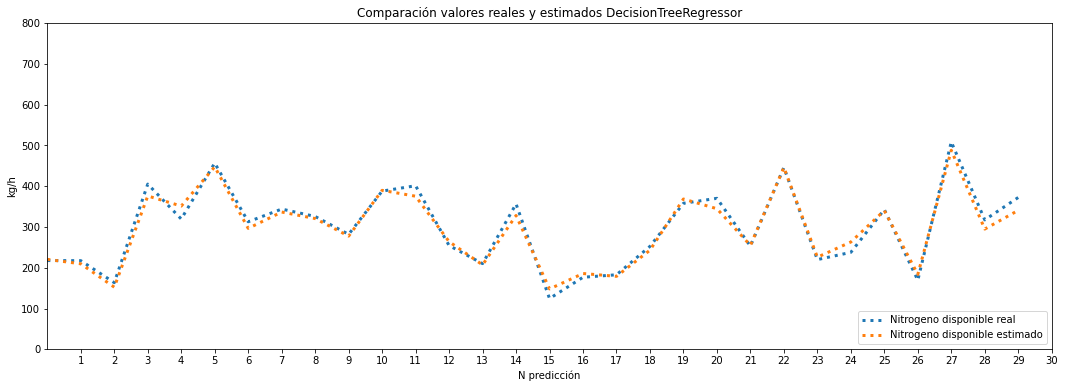

In [24]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados DecisionTreeRegressor')
plt.legend(loc='lower right')
plt.show()


## SVR


In [25]:
regr = SVR(C=100, epsilon=0.2)
regr.fit(X_train, y_train)

SVR(C=100, epsilon=0.2)

In [26]:
pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)


Mean Absolute Error (MAE): 24.52849109336758
Mean Squared Error (MSE): 965.7720516650822
Root Mean Squared Error (RMSE): 31.076873260755853
Mean Absolute Percentage Error (MAPE): 9.08
Accuracy: 90.92
R^2: 0.9130711073741505


0.9130711073741505

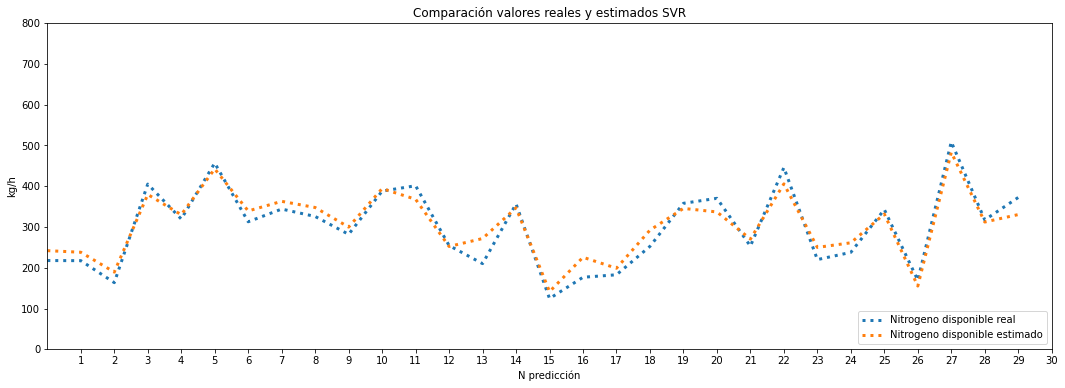

In [27]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados SVR')
plt.legend(loc='lower right')
plt.show()



